# Réponse d'un système



Prenons un système dont ma réponse impulsionnelle est $h(t)=e^{-a.|t|}.u(|t|)$


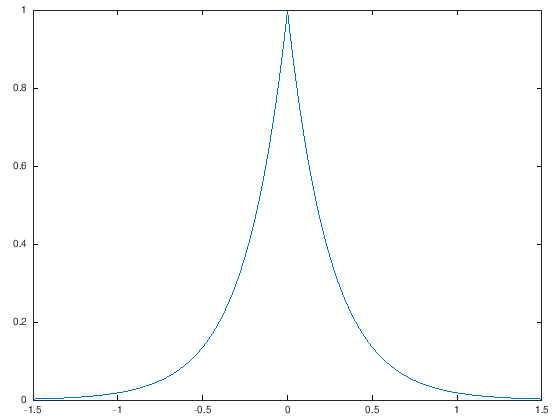

In [17]:
source mes_fonctions.m

%% La rip h et le signal d'entrée x
a=4;
h = @(t) exp(-a*abs(t));

%% Vecteur temps
Te=1/100; tmin=-1.5; tmax= 1.5; temps=tmin:Te:tmax ;
plot_rr(temps,h(temps))



Prenons un signal d'entré $x(t)=t.u(t)$.

On peut le décomposer dans une base temporelle faites d'impulsions localisée à chaque instant :
$x(t) = \int x(\tau) \delta_{\tau}(t) dt$

Où chaque composante du signal $x(\tau)$ est la mesure de $x$ faite à l'instant $\tau$ obtenue en faisant un produit scalaire avec la fonction de base $\delta_{\tau}$. Donc $<x,\delta_{\tau}> = \int x(t).\delta_{\tau}(t) .dt$ est la composante du vecteur $x$ décomposé dans la base temporelle $W_{\tau}=\left(\delta_{\tau}\right)_{\tau\in\R}$

Le signal est donc décomposé par :
$$ \vec{x}=\vvvectBase{\ldots}{<\vec{x},\delta_{\tau}>=x(\tau)}{\dots}{W_{\tau}}$$

On vat approcher ces impulsions par des fonctions portes $\delta_{\tau}\approx \Pi_{\Delta}(t-\tau)$ dans notre simulation et prendre une fenêtre d'observation temporelle finie ```[tmin, tmax]```

La résolution temporelle $\Delta_t$ sera un peu plus grossière que celle du vecteur ```temps``` utilisé pour afficher. 

decimation =  10
Dt =  0.10000


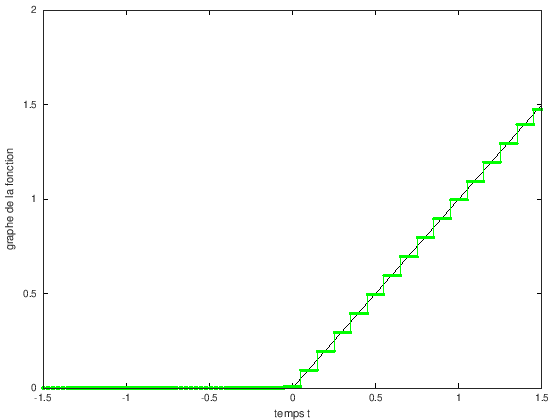

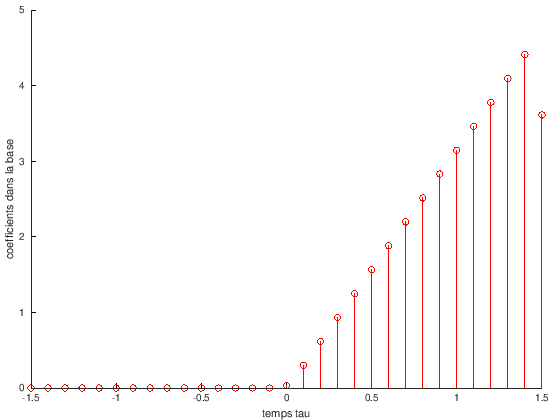

In [2]:
t=temps';
decimation=10
tau = temps(1:decimation:end); % 1 point sur 'decimation' sont gardés
Dt=tau(2)-tau(1) % base de temps grossière pour les calculs

Wtau = porte(t-tau,Dt);  % comme t est vertical et tau horizontal
% wtau contient dans chaque colonne une fonction porte 
% ------> tau
% |
% |
% V 
% t

% Les vecteurs ne sont pas normés ! Faisons-le
Wtau = Wtau / sqrt(Wtau'*Wtau);

% représentations de x
x_de_t =  x(t);                % coordonnées dans la base fine
X_de_tau = Wtau' * x_de_t;    % coordonnées dans la base grossière
x_de_t_reconstruit = Wtau * X_de_tau ;% signal reconstruit grossièrement


plot(t,x_de_t,'k'); hold on;
stairs(t,x_de_t_reconstruit,'g.-')
xlabel('temps t')
ylabel('graphe de la fonction')
figure()
stem(tau,X_de_tau,'r')
xlabel('temps tau')
ylabel('coefficients dans la base')

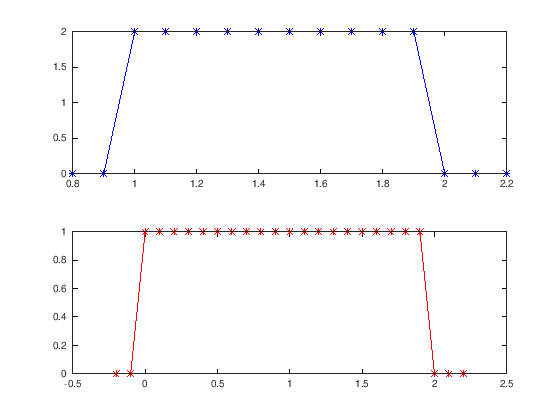

In [3]:
clear all
close all
clc
%% Fonctions usuelles
eps = 1e-6; % Attention aux comparaisons de nombre flottants
u = @(t) (t>=0-eps);           % échelon sur [0, +oo]
porte = @(t,L) u(t+L/2)-u(t-L/2); % porte sur [-L/2, L/2[ <- exclue !

%%______________________________________
%  Calcul de f = g conv d 
% 
%%______________________________________
%% Paramétrez votre script ici

% période d'échantillonnage
Te=0.1 ;

% fonction de gauche
g = @(t) porte(t-1,2); % [1-2/2=0, 1+2/2=2[

%g = @(t) (t==0)
% support de g : [gm gM]
gm=0;
gM=2;

% fonction de droite
d = @(t) 2*porte(t-1.5,1);  % [1.5-1/2=1, 1.5+1/2=2[
% support de d : [gm gM]
dm=1;
dM=2;

%% Ne pas modifier ci-dessous
%% _______________________________________

marge = 2*Te;   % on élargit le support avec une marge pour visualiser

gm = gm-marge ; % pour afficher au moin un zéro avant
gM = gM+marge ; % pour afficher au moin un zéro après
tg = gm:Te:gM ; % temps d'échantillons de g non nul
g_de_t=g(tg);   % valeurs de g

% idem pour d
dm = dm-marge ;
dM = dM+marge ; 
td = dm:Te:dM;
d_de_t=d(td);

%% Affichage
subplot(211)
plot(td,d_de_t,'b*-')
subplot(212)
plot(tg,g_de_t,'r*-')


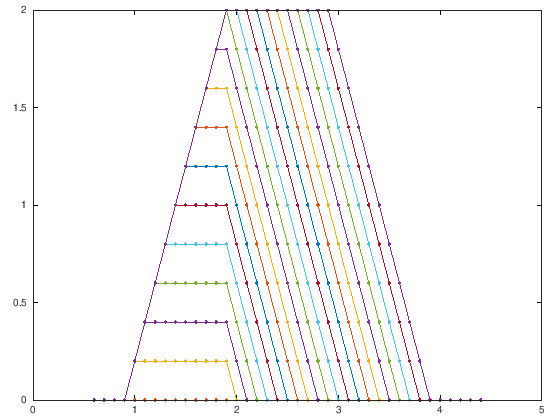

In [4]:
Ng = length(g_de_t);
Nd = length(d_de_t);

temps = gm+dm:Te:gM+dM;
conv = temps*0;

for i = 1:Ng

    conv(i:(i+Nd-1)) = conv(i:(i+Nd-1)) + d_de_t * g_de_t(i)*Te;
    plot(temps,conv,'.-')
    hold on;
end

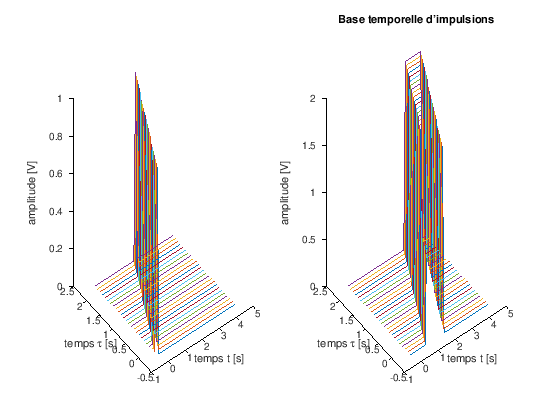

In [5]:
eps=1e-6; % Attention aux comparaison avec des floats
t=gm:Te:(gM+dM); t=t';  % t vertical
tau=tg(1:1:end); % décimation (1 point sur N) 
        % tau horizontal et moins de valeurs 

unite = @(t)  (-eps<=t).*(t<=eps);  % t==0 est risqué en floats

Mt = unite(t-tau);
Md = d(t-tau);
% affichage 
unst = t==t;
unstau = tau==tau;
subplot(121)
plot3(t*unstau,unst*tau,Mt);
xlabel('temps t [s]')
ylabel('temps \tau [s]')
zlabel('amplitude [V]')
subplot(122)
plot3(t*unstau,unst*tau,Md);
xlabel('temps t [s]')
ylabel('temps \tau [s]')
zlabel('amplitude [V]')

title('Base temporelle d''impulsions')

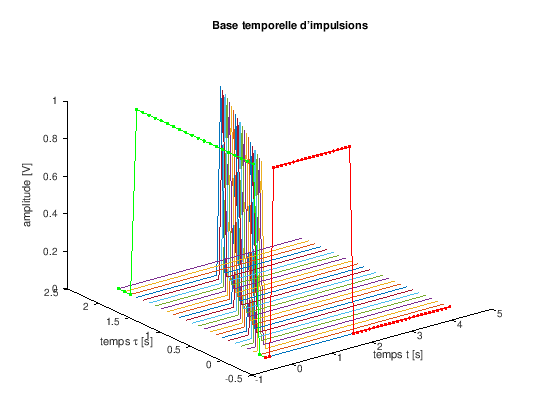

In [6]:
Mgt = Mt.*g(tau); % Les vecteurs de la base d'amplitude g(tau)
Mconv = Md.*g(tau);

%La somme sur tau de ces vecteurs
g_reconstruit = Mgt * unstau';
conv = Mconv * unstau';

% affichage 
unst = t==t;
unstau = tau==tau;
plot3(t*unstau,unst*tau,Mgt);
hold on;
plot3(tau*0+gm,tau,g(tau),'g.-')
plot3(t,t*0+gm,g_reconstruit,'r.-')
xlabel('temps t [s]')
ylabel('temps \tau [s]')
zlabel('amplitude [V]')
title('Base temporelle d''impulsions')

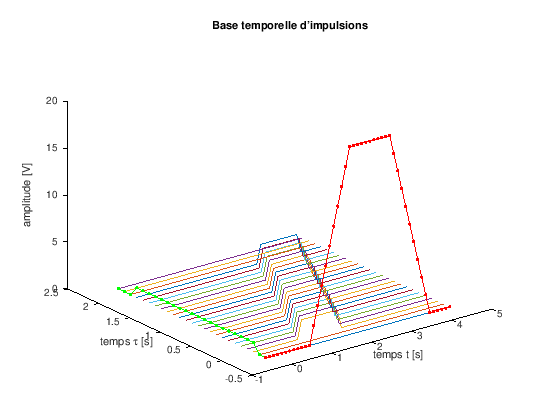

In [7]:
% affichage 
unst = t==t;
unstau = tau==tau;
plot3(t*unstau,unst*tau,Mconv);
hold on;
plot3(tau*0+gm,tau,g(tau),'g.-')
plot3(t,t*0+gm,conv,'r.-')
xlabel('temps t [s]')
ylabel('temps \tau [s]')
zlabel('amplitude [V]')
title('Base temporelle d''impulsions')


In [8]:
help function


 -- function OUTPUTS = function (INPUT, ...)
 -- function function (INPUT, ...)
 -- function OUTPUTS = function
     Begin a function body with OUTPUTS as results and INPUTS as
     parameters.

     See also: return.

Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.
